# Session 11: Missing Data

## 1. What is a NaN Value?

In [1]:
from numpy import nan      #stands for Not A Number
nan==3

False

In [2]:
nan!=3

True

In [3]:
nan is nan

True

In [4]:
nan==nan

False

In [5]:
nan+3

nan

In [6]:
2*nan

nan

In [7]:
sum([nan,3])

nan

In [8]:
import pandas as pd
pd.Series([nan,3,2]).sum()

5.0

In [9]:
pd.Series([nan,3,2]).sum(skipna=False)

nan

In [10]:
import pandas as pd
pd.isnull(nan)
# Opposite is pd.notnull

True

In [11]:
pd.isnull('nan')

False

**Q1:** Predict the output of the each of the following lines without typing them, and then verify by typing.

```python
nan==True
nan==False
nan**2
nan!=nan
pd.isnull('null')
pd.isnull(nan==True)
```

**Answer:** The first two statements are False because nan is not equal to anything. 

The third statement evaluates to nan because any numerical operation with nans evaluates to nan.

The fourth statement (perhaps surprisingly) is True, because `nan==nan` is False.

The last two statements are all False. This is because `'null'` is a string and `'nan==True'` evaluates to `False`, both of which are not `nan`.

**Q2:** Explain the output of the following code using your knowledge of NaNs.

In [12]:
df=pd.DataFrame([[nan,10],[50,nan],[nan,20],[20,10]],columns=['Capacity','Demand'])
df

,Capacity,Demand
0,NaN,10.0
1,50.0,NaN
2,NaN,20.0
3,20.0,10.0


In [13]:
(df['Capacity']-df['Demand']).sum()

10.0

**Explanation:** This takes the difference of the two columns first, and only the last item is not null. Hence, the total is 10. (See below)

In [14]:
df['Capacity']-df['Demand']

0     NaN
1     NaN
2     NaN
3    10.0
dtype: float64

In [15]:
df['Capacity'].sum()-df['Demand'].sum()

30.0

**Explanation:** This takes sums the none-null entries in each column first. The result is 70-40, which is 30.

In [16]:
df.sum(axis=0)

Capacity    70.0
Demand      40.0
dtype: float64

In [17]:
df.sum(axis=1)

0    10.0
1    50.0
2    20.0
3    30.0
dtype: float64

In [18]:
df.sum(axis=1,skipna=False)

0     NaN
1     NaN
2     NaN
3    30.0
dtype: float64

**Explanation:** The first command sums the columns and the second sums the rows. The default behavior is to skip NA values. The third command does not skip NA values, so the sum for the first three rows is NaN.

## 2. Handling Missing Values

### Loading the Ebola Dataset

In [19]:
import pandas as pd
base='https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'
filename='country_timeseries.csv'
ebola=pd.read_csv(base+filename)
ebola['Date']=pd.to_datetime(ebola['Date'])
ebola.set_index('Date',inplace=True)
ebola.iloc[:5,:6]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal
Date,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN


### Counting Missing Entries

In [20]:
ebola.iloc[:5,:6].isnull()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal
Date,,,,,,
2015-01-05,False,False,True,False,True,True
2015-01-04,False,False,True,False,True,True
2015-01-03,False,False,False,False,True,True
2015-01-02,False,True,False,True,True,True
2014-12-31,False,False,False,False,True,True


In [21]:
ebola.isnull().sum()

Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [22]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1)
memory usage: 17.2 KB


In [23]:
ebola['Deaths_Mali'].count()

12

**Q3-a:** Count the number of missing entries in each column of the `df` DataFrame from Q2.

In [24]:
df.isnull().sum()

Capacity    2
Demand      1
dtype: int64

**Q3-b:** Write a command to count the number of rows in which the difference between capacity and demand is missing.

In [25]:
(df['Capacity']-df['Demand']).isnull().sum()

3

**Q3-c:** Similar to Q3-b, except count the number of rows in which the difference is not missing.

In [26]:
(df['Capacity']-df['Demand']).count()

1

In [27]:
(df['Capacity']-df['Demand']).notnull().sum()

1

### Filling Missing Values

In [28]:
guinea=ebola['Cases_Guinea']
guinea.head()

Date
2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02       NaN
2014-12-31    2730.0
Name: Cases_Guinea, dtype: float64

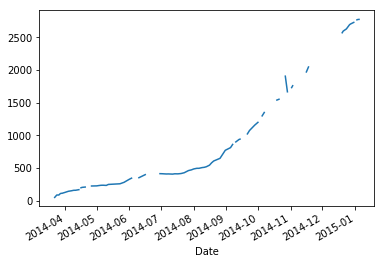

In [53]:
guinea.plot()

In [30]:
guinea.fillna(0).head()

Date
2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02       0.0
2014-12-31    2730.0
Name: Cases_Guinea, dtype: float64

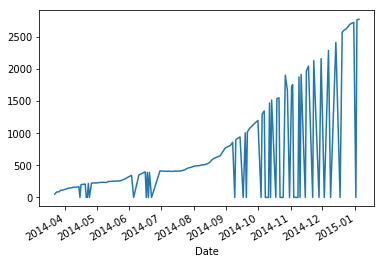

In [31]:
guinea.fillna(0).plot()

In [32]:
guinea.fillna(method='ffill').head()

Date
2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02    2769.0
2014-12-31    2730.0
Name: Cases_Guinea, dtype: float64

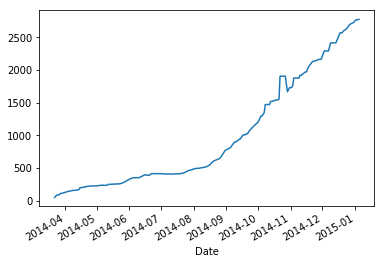

In [33]:
guinea.fillna(method='ffill').plot()

In [34]:
guinea.fillna(method='bfill').head()

Date
2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02    2730.0
2014-12-31    2730.0
Name: Cases_Guinea, dtype: float64

In [35]:
guinea.interpolate().head()

Date
2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02    2749.5
2014-12-31    2730.0
Name: Cases_Guinea, dtype: float64

In [36]:
df

,Capacity,Demand
0,NaN,10.0
1,50.0,NaN
2,NaN,20.0
3,20.0,10.0


In [37]:
df['Capacity'].fillna(df['Demand'])

0    10.0
1    50.0
2    20.0
3    20.0
Name: Capacity, dtype: float64

In [38]:
df.dropna()

,Capacity,Demand
3,20.0,10.0


In [39]:
df['Capacity'].first_valid_index()

1

In [40]:
df['Capacity'].last_valid_index()

3

**Q4-a:** An analyst would like to calculate the average value of the "Cases_Guinea" column of the the ebola Dataset. The analyst runs the below command. Explain why this result might be misleading. 

In [41]:
guinea.mean()

911.0645161290323

**Q4-b:** Write a command that corrects the above issue.

In [42]:
guinea.fillna(method='ffill').mean()

1023.7295081967213

Any of the following also obtains a similar result. 

In [43]:
guinea.fillna(method='bfill').mean()

1005.139344262295

In [44]:
guinea.interpolate().mean()

1014.4344262295082

**Q5:** Plot the total number of cases and the total number of deaths due to Ebola in the data set from all of the countries, while handling missing data appropriately. 

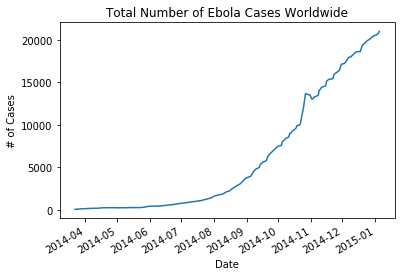

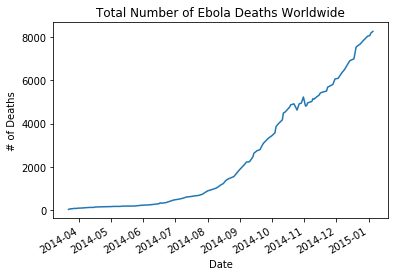

In [45]:
cases=ebola.fillna(method='bfill').iloc[:,1:9].sum(axis=1)
deaths=ebola.fillna(method='bfill').iloc[:,9:].sum(axis=1)

import matplotlib.pyplot as plt
cases.plot(title='Total Number of Ebola Cases Worldwide')
plt.ylabel('# of Cases')
plt.show()

deaths.plot(title='Total Number of Ebola Deaths Worldwide')
plt.ylabel('# of Deaths')
plt.show()

**Q6:** Obtain the first non-null value of the column "Cases_UnitedStates", as well as the date on which this is recorded. (Since the dates are ordered backward, this is the last recorded value and the last recorded date). Do the same also for the last non-null value of the column.

In [46]:
# Index of first non-null value
usa=ebola['Cases_UnitedStates']
usa.first_valid_index()

Timestamp('2014-12-07 00:00:00')

In [47]:
# First non-null value
usa[usa.first_valid_index()]

4.0

In [48]:
# Index of last non-null value
usa.last_valid_index()

Timestamp('2014-10-01 00:00:00')

In [49]:
# Last non-null value
usa[usa.last_valid_index()]

1.0

**Q7:** Based on the information in the dataset, obtain an estimate of the number of cases of ebola in each of the countries in the dataset on Jan 5, 2015. Appropriately display the information in a pie chart.

In [50]:
ebola.fillna(method='bfill').iloc[0,1:9]

Cases_Guinea           2776.0
Cases_Liberia          8166.0
Cases_SierraLeone     10030.0
Cases_Nigeria            20.0
Cases_Senegal             1.0
Cases_UnitedStates        4.0
Cases_Spain               1.0
Cases_Mali                7.0
Name: 2015-01-05 00:00:00, dtype: float64

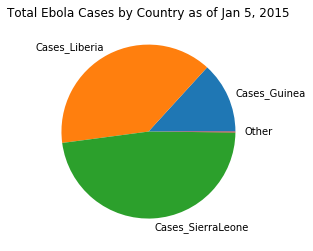

In [51]:
ebola_cleaned=ebola.fillna(method='bfill')
result=ebola_cleaned.iloc[0,1:4]
result['Other']=sum(ebola_cleaned.iloc[0,4:9])

import matplotlib.pyplot as plt
result.plot(kind='pie',title='Total Ebola Cases by Country as of Jan 5, 2015')
plt.ylabel('')
plt.show()

This is how you do it for an arbitrary date that may or may not be in the Dataset. The following example is for 2014 Sep 1. 

In [54]:
import numpy as np
ebola.index[np.where(ebola.index<pd.datetime(2014,7,1))].max()

Timestamp('2014-06-30 00:00:00')

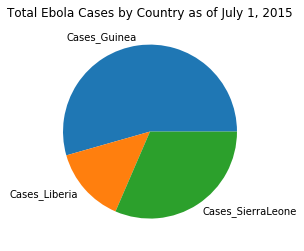

In [55]:
date=ebola.index[np.where(ebola.index<pd.datetime(2014,7,1))].max()
result=ebola_cleaned.loc[date,:].iloc[1:4]
result['Other']=sum(ebola_cleaned.loc[date,:].iloc[4:9])

import matplotlib.pyplot as plt
result.plot(kind='pie',title='Total Ebola Cases by Country as of July 1, 2015')
plt.ylabel('')
plt.show()